# lambda 函数用法

In [2]:
import random

In [3]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|'))#.split()[0]

In [4]:
adj()

' 小小的'

In [5]:
def adj_star():
    return random.choice(["",adj()+adj_star()])#会死循环，每一次.choice

In [6]:
def adj_star_1():
    return random.choice([lambda :'',lambda : adj()+adj_star_1()])()

In [7]:
adj_star_1()

' 小小的'

# 02

# 城市坐标

In [9]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [10]:
import re

In [11]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [12]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.?\d+),\s(\d+.?\d+)\]")#r代表这是个正则表达，？表示有或者没有，\[:\斜杠表示转译,[在正则中有其他意思。\s？？

In [13]:
city_info = pattern.findall(test_string)
city_info

[('兰州', '103.73', '36.03')]

In [14]:
city_location = {}

In [15]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]##[0]别忘了
    
    long, lat = float(long), float(lat)#字符串转float数子
    
    city_location[city] = (long, lat)

In [16]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [17]:
import math

In [18]:
#根据经纬度计算直线距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)#radians() 方法将角度转换为弧度
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))#atan2() 返回给定的 X 及 Y 坐标值的反正切值;sqrt() 方法返回数字x的平方根
    d = radius * c

    return d

In [19]:
geo_distance((114.17, 22.28),(113.54, 22.19))

70.16960262636923

In [20]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [21]:
get_geo_distance("香港","澳门")

70.16960262636923

In [22]:
import networkx as nx

In [23]:
city_graph = nx.Graph()#创建一个nx.Graph对象

In [24]:
city_graph.add_nodes_from(list(city_location.keys()))#.keys() 方法会返回一个由一个给定对象的自身可枚举属性组成的数组

In [25]:
list(city_location.keys())

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '海口',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '台湾',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '西藏',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

In [94]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

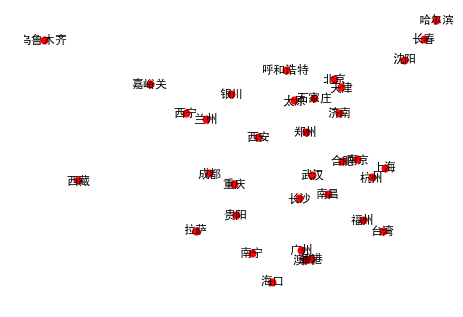

In [28]:
nx.draw(city_graph, city_location, with_labels=True, node_size=50)

In [29]:
from collections import defaultdict
city_connection = defaultdict(list)#defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值

In [30]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < 300:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [31]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [32]:
city_with_road = nx.Graph(city_connection)

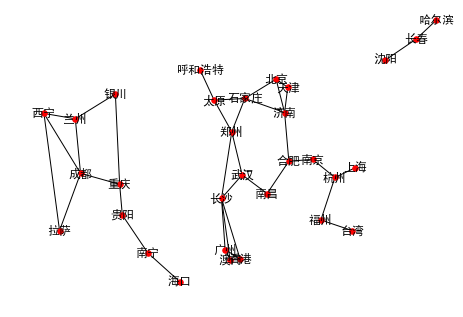

In [33]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

# 例子

In [34]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [35]:
simple_connection_info = defaultdict(list)

In [36]:
simple_connection_info.update(simple_connection_info_src)#update() 方法用于更新字典中的键/值对，可以修改存在的键对应的值，也可以添加新的键/值对到字典中。

In [37]:
simple_connection_info

defaultdict(list,
            {'北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '兰州': ['西安'],
             '郑州': ['太原'],
             '西安': ['兰州', '长沙'],
             '长沙': ['福州', '南宁'],
             '沈阳': ['北京']})

In [38]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()##set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等
    while visited:
        froninter = visited.pop() #用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值
        #print(froninter)
        if froninter in seen: continue
        for successor in graph[froninter]:
            if successor in seen: continue
            visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            #visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
        print(seen)
        seen.add(froninter)
    
    return seen

In [39]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [84]:
bfs(number_grpah, 3)

set()
{3}
{3, 5}
{3, 5, 7}
{8, 3, 5, 7}
{1, 3, 5, 7, 8}
{1, 2, 3, 5, 7, 8}
{1, 2, 3, 4, 5, 7, 8}


{1, 2, 3, 4, 5, 6, 7, 8}

In [41]:
simple_connection_info['西安']

['兰州', '长沙']

In [82]:
bfs(simple_connection_info, "西安")

set()
{'西安'}
{'长沙', '西安'}
{'长沙', '南宁', '西安'}
{'长沙', '南宁', '福州', '西安'}


{'兰州', '南宁', '福州', '西安', '长沙'}

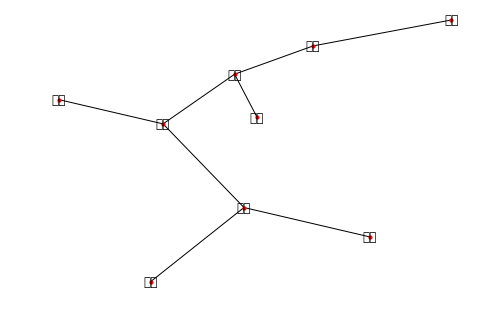

In [42]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

# 例子结束

In [32]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]##[[起始，目的地]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue#找到目的地
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop，找到起始
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        #print(pathes)

In [33]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [34]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [35]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i - 1], path[i])
        return distance

    return sorted(pathes, key=get_path_distnace)# key主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序

In [36]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [37]:
#pretty_print(search('北京', '福州', simple_connection_info))

In [40]:
pretty_print(search('香港', '太原', city_connection, sort_candidate=shortest_path_first))

香港🚗->长沙🚗->郑州🚗->太原


# 

# networkx不显示中文

In [98]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] ###加这两家显示中文
matplotlib.rcParams['font.family']='sans-serif'

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


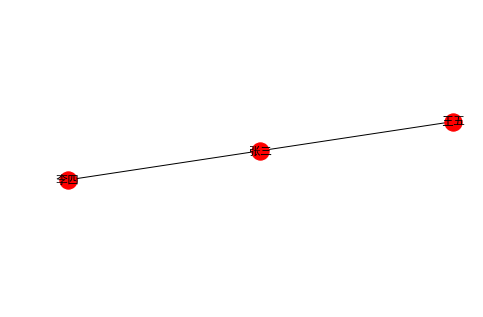

In [99]:
# coding = utf-8
from pylab import *
import networkx as nx
g=nx.Graph()
g.add_edge('张三','李四')
g.add_edge('张三','王五')
nx.draw(g,with_labels=True)
plt.show()

In [51]:
import matplotlib
print(matplotlib.__path__)

['D:\\Anaconda3\\lib\\site-packages\\matplotlib']


# 作业02 北京地铁换乘


# 爬虫

In [28]:
import requests
import re

In [24]:
url = 'http://www.bjsubway.com/station/zjgls/'
response = requests.get(url)
response.encoding = 'GBK'
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

In [25]:
#模拟浏览器
url = "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36'}
r = requests.get(url=url,headers = headers)
r.encoding = 'utf-8'
r.text

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html>\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="北京地铁（Beijing Subway）是服务于中国北京市的城市轨道交通系统，也是国际地铁联盟（CoMET）的14个成员之一，其第一条线路于1971年1月15日正式开通运营，使北京成为中国第一个开通地铁的城市。2017年，北京地铁年乘客量达到45.3亿人次，日均客流为1241.1万人次，单日客运量最高达1327.46万人次。截至2018年12月，北京地铁运营线路共有22条地铁线路，均采用地铁系统，覆盖北京市11个市辖区，运营里程637千米，共设车站391座，开通里程居中国第二位。在建线路15条，共320.8千米。2018年12月30日，北京地铁8号线三期、8号线四期、6号线西延等线路开通试运营。至此，北京地铁新增里程28.6公里，运营总里程达636.8公里。到2020年，北京地铁将形成线网由30条运营，总长1177公里的的轨道交通网络。 北京轨道交通1月20日起试行推出电子定期票，为乘客地...">\n<title>北京地铁（北京市城市轨道交通系统）_百度百科</title>\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">\n\n<meta name="keywords" content="北京地铁 北京地铁概况 Beijing Subway 北京轨道交通 北京地铁发展历程 北京地铁运营情况 北京地铁设备设施 北京地铁乘坐导引 北京地铁文化特色 北京地铁建设规划 北京地铁价值意义">\n<meta name="image" content="https://bkssl.bdimg.com/cms/static

In [92]:
test_string = "<th>前门——崇文门</th>"
pattern = re.compile(r"<th>(\w+)——(\w+)</th>")
info = pattern.findall(test_string)
print(info)

[('前门', '崇文门')]


In [59]:
what_we_want = r'(\w+)——(\w+)'#正则专用符号. ? []

In [60]:
pattern = re.compile(what_we_want)

In [114]:
subway_station = pattern.findall(response.text)
subway_station

[('苹果园', '古城'),
 ('古城', '八角游乐园'),
 ('八角游乐园', '八宝山'),
 ('八宝山', '玉泉路'),
 ('玉泉路', '五棵松'),
 ('五棵松', '万寿路'),
 ('万寿路', '公主坟'),
 ('公主坟', '军事博物馆'),
 ('军事博物馆', '木樨地'),
 ('木樨地', '南礼士路'),
 ('南礼士路', '复兴门'),
 ('复兴门', '西单'),
 ('西单', '天安门西'),
 ('天安门西', '天安门东'),
 ('天安门东', '王府井'),
 ('王府井', '东单'),
 ('东单', '建国门'),
 ('建国门', '永安里'),
 ('永安里', '国贸'),
 ('国贸', '大望路'),
 ('大望路', '四惠'),
 ('四惠', '四惠东'),
 ('西直门', '车公庄'),
 ('车公庄', '阜成门'),
 ('阜成门', '复兴门'),
 ('复兴门', '长椿街'),
 ('长椿街', '宣武门'),
 ('宣武门', '和平门'),
 ('和平门', '前门'),
 ('前门', '崇文门'),
 ('崇文门', '北京站'),
 ('北京站', '建国门'),
 ('建国门', '朝阳门'),
 ('朝阳门', '东四十条'),
 ('东四十条', '东直门'),
 ('东直门', '雍和宫'),
 ('雍和宫', '安定门'),
 ('安定门', '鼓楼大街'),
 ('鼓楼大街', '积水潭'),
 ('积水潭', '西直门'),
 ('安河桥北', '北宫门'),
 ('北宫门', '西苑'),
 ('西苑', '圆明园'),
 ('圆明园', '北京大学东门'),
 ('北京大学东门', '中关村'),
 ('中关村', '海淀黄庄'),
 ('海淀黄庄', '人民大学'),
 ('人民大学', '魏公村'),
 ('魏公村', '国家图书馆'),
 ('国家图书馆', '动物园'),
 ('动物园', '西直门'),
 ('西直门', '新街口'),
 ('新街口', '平安里'),
 ('平安里', '西四'),
 ('西四', '灵境胡同'),
 ('灵境胡同', '西单'),
 ('西单', '宣武门'),
 ('宣武门', '菜市口'

In [115]:
subway_station_connection = defaultdict(list)
for s1 in subway_station:
    subway_station_connection[s1[0]].append(s1[1])
    subway_station_connection[s1[1]].append(s1[0])

In [116]:
subway_station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [81]:
subway_station_connection['王府井']

['天安门东', '东单']

In [21]:
url = 'https://blog.csdn.net/yanliang1/article/details/20897805'
response_map = requests.get(url)
response_map.encoding = 'utf-8'
response_map.text

'<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta charset="UTF-8">\n    <link rel="canonical" href="https://blog.csdn.net/yanliang1/article/details/20897805"/>\n    <meta http-equiv="content-type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit"/>\n    <meta name="force-rendering" content="webkit"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n    <meta name="report" content=\'{"pid":"blog"}\'>\n    <meta name="referrer" content="always">\n    <meta http-equiv="Cache-Control" content="no-siteapp" /><link rel="alternate" media="handheld" href="#" />\n    <meta name="shenma-site-verification" content="5a59773ab8077d4a62bf469ab966a63b_1497598848">\n        <meta name="csdn-baidu-search"  content=\'{"autorun":true,"install":tr

In [234]:
map ="""
苹果园,116.411707,39.983603
古城,116.197072, 39.913414
八角游乐园,116.21939, 39.913076
八宝山,116.242277, 39.913185
玉泉路,116.25947, 39.913501
五棵松,116.280423, 39.913833
万寿路,116.30155, 39.91371
公主坟,116.316696, 39.913509
军事博物馆,116.330349, 39.913214
木樨地,116.344097, 39.913125
南礼士路,116.359221, 39.912979
复兴门,116.364381, 39.913014
西单,116.383402, 39.913357
天安门西,116.39805, 39.913776
天安门东,116.407851, 39.91408
王府井,116.417796, 39.914398
东单,116.426004, 39.914476
建国门,116.44084, 39.914526
永安里,116.457089, 39.914223
国贸,116.46667, 39.914138
大望路,116.482387, 39.91413 
四惠,116.501945, 39.91486
四惠东,116.522347, 39.914943
西直门,116.362125, 39.946021
积水潭,116.379185, 39.954765
鼓楼大街,116.399937, 39.955358
安定门,116.414597, 39.955441
雍和宫,116.42325, 39.955573
东直门,116.440288, 39.947302
东四十条,116.440638, 39.939841
朝阳门,116.441075, 39.930642
建国门,116.442313, 39.914513
北京站,116.433608, 39.911127
崇文门,116.423881, 39.907367
前门,116.404276, 39.906534
和平门,116.390619, 39.906362
宣武门,116.380848, 39.905881
长椿街,116.369911, 39.90534
复兴门,116.363143, 39.913029
阜成门,116.362817, 39.929522
车公庄,116.362436, 39.938489
安河桥北,116.276432,40.018657
北宫门,116.28399,40.008678
西苑,116.298094,40.004726
圆明园,116.315938,40.005466
北京大学东门,116.322265,39.998006
中关村,116.323066,39.989956
海淀黄庄,116.324348,39.981865
人民大学,116.32809,39.97277
魏公村,116.329874,39.963457
国家图书馆,116.331897,39.948864
动物园,116.345204,39.943923  
西直门,116.362125, 39.946021
新街口,116.374132,39.94658 
平安里,116.378635,39.939264 
西四,116.378635,39.939264 
灵境胡同,116.380223,39.922136 
西单,116.383402, 39.913357 
宣武门,116.380848, 39.905881 
菜市口,116.38074,39.895375  
陶然亭,116.380902,39.884625  
北京南站,116.385169,39.870965 
马家堡,116.377878,39.859199  
角门西,116.377644,39.851929 
公益西桥,116.377314,39.843056

宋家庄,116.434913,39.851941
刘家窑,116.428565,39.863697 
蒲黄榆,116.428894,39.871689  
天坛东门,116.427392,39.888497  
磁器口,116.426035,39.899339 
崇文门,116.423881, 39.907367 
东单,116.426004, 39.914476
灯市口,116.424169,39.923603  
东四,116.423405,39.930647  
张自忠路,116.423579,39.939914 
北新桥,116.423298,39.947112  
雍和宫,116.42325, 39.955573  
和平里北街,116.425051,39.964752 
和平西桥,116.424463,39.974502  
惠新西街南口,116.42404,39.983276  
惠新西街北口,116.423532,39.994151  
大屯路东,116.424567,40.009611  
北苑路北,116.424525,40.036821 
立水桥南,116.420973,40.048143 
立水桥,116.418274,40.059244  
天通苑南,116.419113,40.072752 
天通苑,116.419233,40.081478 
天通苑北,116.419385,40.089597 

海淀五路居,116.282736,39.9386
慈寿寺,116.300677,39.93927
花园桥,116.317559,39.938382
白石桥南,116.332038,39.938399
车公庄西,116.350644,39.938074
车公庄,116.362436, 39.938489 
平安里,116.378635,39.939264 
北海北,116.39289,39.939493 
南锣鼓巷,116.409683,39.93984 
东四,116.423405,39.930647 
朝阳门,116.441075, 39.930642
东大桥,116.458252,39.928625
呼家楼,116.468237,39.928981 
金台路,116.484892,39.929069 
十里堡,116.508479,39.929238 
青年路,116.523829,39.929469 
褡裢坡,116.570223,39.929826 
黄渠,116.584917,39.929937 
常营,116.605447,39.93151 
草房,116.622546,39.930673
物资学院路,116.645543,39.933087
通州北关,116.668053,39.924687
通运门,116.657053,39.90687
北运河西,116.694432,39.90893 
北运河东,116.71603,39.907657 
郝家府,116.724215,39.909286
东夏园,116.740896,39.909493 
潞城,116.754799,39.90889

北京西站,116.327811,39.900677
湾子,116.3344,39.895902
达官营,116.342069,39.895671
广安门内,116.364626,39.89543 
菜市口,116.38074,39.895375 
虎坊桥,116.390654,39.895691 
珠市口,116.404574,39.89767
桥湾,116.414901,39.899001
磁器口,116.426035,39.899339 
广渠门内,116.440943,39.899616
广渠门外,116.455911,39.899309 
九龙山,116.484689,39.899525 
大郊亭,116.494711,39.899072
百子湾,116.50382,39.898935
化工,116.510091,39.893222
南楼梓庄,116.507808,39.88078
欢乐谷景区,116.505927,39.872916
垡头,116.51527,39.86916
双合,116.533265,39.866414
焦化厂,116.543631,39.861686 

朱辛庄,116.32013,40.110334 
育知路,116.333898,40.09371 
平西府,116.357247,40.095792
回龙观东大街,116.369753,40.086965 
霍营,116.366721,40.077129 
育新,116.353997,40.066124 
西小口,116.358213,40.052716 
永泰庄,116.361159,40.043692 
林萃桥,116.378905,40.027995
森林公园南门,116.399036,40.016211 
奥林匹克公园,116.398711,40.007852 
奥体中心,116.400191,39.992442
北土城,116.400663,39.983255 
安华桥,116.400603,39.974878 
安德里北街,116.400884,39.963931 
鼓楼大街,116.399937, 39.955358 
什刹海,116.402547,39.944154 
南锣鼓巷,116.409683,39.93984 

郭公庄,116.308567,39.820764
丰台科技园,116.303639,39.831449
科怡路,116.303808,39.838664 
丰台南路,116.302854,39.847201 
丰台东大街,116.300215,39.86144
七里庄,116.300553,39.873015
六里桥,116.30961,39.886428 
六里桥东,116.321463,39.89278 
北京西站,116.327811,39.900677 
军事博物馆,116.330349, 39.913214
白堆子,116.332359,39.929707 
白石桥南,116.332038,39.938399 
国家图书馆,116.331897,39.948864

巴沟,116.299578,39.980549
苏州街,116.312768,39.981704  
海淀黄庄,116.324348,39.981865
知春里,116.336091,39.982061 
知春路,116.347619,39.982065 
西土城,116.360484,39.982026 
牡丹园,116.376446,39.982371 
健德门,116.387816,39.982833 
北土城,116.400663,39.983255 
安贞门,116.412371,39.983322  
惠新西街南口,116.42404,39.983276
芍药居,116.454059,39.978367 
三元桥,116.463573,39.96688 
太阳宫,116.454059,39.978367
亮马桥,116.468743,39.955006 
农业展览馆,116.468772,39.946988  
团结湖,116.468337,39.939382  
呼家楼,116.468237,39.928981 
金台夕照,116.468282,39.922961
国贸,116.46667, 39.914138 
双井,116.468453,39.899186 
劲松,116.46801,39.890027 
潘家园,116.467741,39.881735  
十里河,116.465176,39.871712  
分钟寺,116.460348,39.857886  
成寿寺,116.454315,39.851457  
宋家庄,116.434913,39.851941
石榴庄,116.420566,39.852109  
大红门,116.406253,39.851841 
角门东,116.392751,39.851487  
角门西,116.377644,39.851929  
草桥,116.359241,39.851597 
纪家庙,116.339533,39.850124
首经贸,116.326613,39.85032 
丰台站,116.311475,39.856026  
泥洼,116.310813,39.8647 
西局,116.309898,39.87224 
六里桥,116.30961,39.886428 
莲花桥,116.316823,39.904081  
公主坟,116.316696, 39.913509  
西钓鱼台,116.304186,39.929671  
慈寿寺,116.300677,39.93927  
车道沟,116.300274,39.954895  
长春桥,116.300461,39.964876  
火器营,116.29561,39.972383 

西直门,116.362125, 39.946021  
大钟寺,116.35182,39.972034 
知春路,116.347619,39.982065
五道口,116.344434,39.998568  
上地,116.326836,40.038699  
西二旗,116.312621,40.058918 
龙泽,116.326173,40.076647  
回龙观,116.34232,40.076426 
霍营,116.366721,40.077129 
立水桥,116.418274,40.059244   
北苑,116.441315,40.048872  
望京西,116.455596,40.001109 
芍药居,116.443571,39.983549  
光熙门,116.438355,39.974474  
柳芳,116.439265,39.964106  
东直门,116.440288, 39.947302

张郭庄,116.193406,39.864102
园博园,116.208364,39.867099
大瓦窑,116.246953,39.865215 
郭庄子,116.259835,39.870755  
大井,116.281826,39.871571 
七里庄,116.300553,39.873015 
西局,116.309898,39.87224 
善各庄,116.484762,40.03309 
陶然桥,116.397014,39.878534 
永定门外,116.405729,39.873727 
景泰,116.417164,39.871443
方庄,116.446196,39.871749 
北工大西门,116.484017,39.880747
南八里庄,116.474017,39.873747
平乐园,116.483967,39.890758
北京南站,116.385169,39.870965
蒲黄榆,116.428894,39.871689
十里河,116.465176,39.871712
九龙山,116.484689,39.899525 
大望路,116.482387, 39.91413
红庙,116.484892,39.919069
朝阳公园,116.484946,39.939443
枣营,116.48155,39.950188
东风北桥,116.492579,39.9645
阜通,116.477642,39.997887 
望京,116.475304,40.004532 
金台路,116.484892,39.929069
将台,116.496253,39.97696
高家园,116.496253,39.98696
望京南,116.488454,39.990534
东湖渠,116.474032,40.016228 
来广营,116.473489,40.026145

俸伯,116.69145,40.138304 
顺义,116.663478,40.136138 
石门,116.647499,40.136314 
南法信,116.616411,40.134458 
后沙峪,116.570793,40.119865 
花梨坎,116.564223,40.090312
国展,116.449021,39.96729 
孙河,116.54104,40.051264
马泉营,116.509638,40.039847 
崔各庄,116.499145,40.028437
望京东,116.4933,40.00927 
望京,116.475304,40.004532
望京西,116.455596,40.001109 
关庄,116.437889,40.007136
大屯路东,116.424567,40.009611 
安立路,116.414285,40.008946
奥林匹克公园,116.398711,40.007852 
北沙滩,116.375561,40.007538
六道口,116.359309,40.006718
清华东路西口,116.345527,40.0063

西苑,116.298094,40.004726
农大南路,116.288702,40.027823 
马连洼,116.279261,40.038769
西北旺,116.264078,40.055297 
永丰南,116.254611,40.071669 
永丰,116.244766,40.077644
屯佃,116.222442,40.074106 
稻香湖路,116.194753,40.074788 
温阳路,116.167825,40.074892 
北安河,116.136825,40.073863 

四惠,116.501945, 39.91486 
四惠东,116.522347, 39.914943  
高碑店,116.538,39.915798  
传媒大学,116.561375,39.915197  
双桥,116.583332,39.915885  
管庄,116.605782,39.914907  
八里桥,116.625141,39.912218  
通州北苑,116.64361,39.910064  
果园,116.653044,39.89966 
九棵树,116.663922,39.896462 
梨园,116.675218,39.889716 
临河里,116.685467,39.881239  
土桥,116.69298,39.877629

昌平西山口,116.202226,40.250294  
十三陵景区,116.214346,40.245742 
昌平,116.240088,40.226351  
昌平东关,116.268533,40.227946
北邵洼,116.287975,40.228114 
南邵,116.293505,40.21343 
沙河高教园,116.286757,40.171012 
沙河,116.295058,40.154693 
巩华城,116.300434,40.137318 
朱辛庄,116.32013,40.110334
生命科学园,116.30055,40.100975  
西二旗,116.312621,40.058918 

宋家庄,116.434913,39.851941 
肖村,116.455024,39.839926  
小红门,116.465808,39.83399  
旧宫,116.467432,39.812543  
亦庄桥,116.486851,39.808826 
亦庄文化园,116.49701,39.812839 
万源街,116.511928,39.809251  
荣京东街,116.519744,39.799616 
荣昌东街,116.528038,39.789194  
同济南路,116.546383,39.779147  
经海路,116.568912,39.789493  
次渠南,116.587934,39.800804 
次渠,116.597911,39.809191

郭公庄,116.308567,39.820764 
大葆台,116.298159,39.814112
稻田,116.225429,39.800509 
长阳,116.219263,39.769411 
篱笆房,116.195928,39.766697 
广阳城,116.191395,39.754016
良乡大学城北,116.189861,39.736109 
良乡大学城,116.182872,39.729499
良乡大学城西,116.162684,39.7296 
良乡南关,116.147255,39.72947
苏庄,116.131898,39.729197

东直门,116.440288, 39.947302 
三元桥,116.463573,39.96688 
T3航站楼,116.621643,40.058887 
T2航站楼,116.599563,40.085493 

公益西桥,116.377314,39.843056
新宫,116.372097,39.818302  
西红门,116.335169,39.795445  
高米店北,116.337331,39.779548  
高米店南,116.33841,39.769059  
枣园,116.338975,39.759079 
清源路,116.339019,39.748354  
黄村西大街,116.339128,39.73738
黄村火车站,116.339482,39.728326 
义和庄,116.325538,39.718296 
生物医药基地,116.328329,39.692307 
天宫院,116.326437,39.676122

石厂,116.106975,39.895137 
小园,116.121303,39.896146  
栗园庄,116.129827,39.901771
上岸,116.128714,39.911139  
桥户营,116.132271,39.918355 
四道桥,116.140356,39.922119 
金安桥,116.169398,39.930086

"""

In [235]:
subway_location = {}
for line in map.split('\n'):
    print(line)
    if not line: continue
    subway_map = line.split(",")
    subway = subway_map[0]
    long = subway_map[1]
    lat = subway_map[2]
    
    long, lat = float(long), float(lat)#字符串转float数子
    
    subway_location[subway] = (long, lat)


苹果园,116.411707,39.983603
古城,116.197072, 39.913414
八角游乐园,116.21939, 39.913076
八宝山,116.242277, 39.913185
玉泉路,116.25947, 39.913501
五棵松,116.280423, 39.913833
万寿路,116.30155, 39.91371
公主坟,116.316696, 39.913509
军事博物馆,116.330349, 39.913214
木樨地,116.344097, 39.913125
南礼士路,116.359221, 39.912979
复兴门,116.364381, 39.913014
西单,116.383402, 39.913357
天安门西,116.39805, 39.913776
天安门东,116.407851, 39.91408
王府井,116.417796, 39.914398
东单,116.426004, 39.914476
建国门,116.44084, 39.914526
永安里,116.457089, 39.914223
国贸,116.46667, 39.914138
大望路,116.482387, 39.91413 
四惠,116.501945, 39.91486
四惠东,116.522347, 39.914943
西直门,116.362125, 39.946021
积水潭,116.379185, 39.954765
鼓楼大街,116.399937, 39.955358
安定门,116.414597, 39.955441
雍和宫,116.42325, 39.955573
东直门,116.440288, 39.947302
东四十条,116.440638, 39.939841
朝阳门,116.441075, 39.930642
建国门,116.442313, 39.914513
北京站,116.433608, 39.911127
崇文门,116.423881, 39.907367
前门,116.404276, 39.906534
和平门,116.390619, 39.906362
宣武门,116.380848, 39.905881
长椿街,116.369911, 39.90534
复兴门,116.363143, 39.9

In [236]:
subway_location

{'苹果园': (116.411707, 39.983603),
 '古城': (116.197072, 39.913414),
 '八角游乐园': (116.21939, 39.913076),
 '八宝山': (116.242277, 39.913185),
 '玉泉路': (116.25947, 39.913501),
 '五棵松': (116.280423, 39.913833),
 '万寿路': (116.30155, 39.91371),
 '公主坟': (116.316696, 39.913509),
 '军事博物馆': (116.330349, 39.913214),
 '木樨地': (116.344097, 39.913125),
 '南礼士路': (116.359221, 39.912979),
 '复兴门': (116.363143, 39.913029),
 '西单': (116.383402, 39.913357),
 '天安门西': (116.39805, 39.913776),
 '天安门东': (116.407851, 39.91408),
 '王府井': (116.417796, 39.914398),
 '东单': (116.426004, 39.914476),
 '建国门': (116.442313, 39.914513),
 '永安里': (116.457089, 39.914223),
 '国贸': (116.46667, 39.914138),
 '大望路': (116.482387, 39.91413),
 '四惠': (116.501945, 39.91486),
 '四惠东': (116.522347, 39.914943),
 '西直门': (116.362125, 39.946021),
 '积水潭': (116.379185, 39.954765),
 '鼓楼大街': (116.399937, 39.955358),
 '安定门': (116.414597, 39.955441),
 '雍和宫': (116.42325, 39.955573),
 '东直门': (116.440288, 39.947302),
 '东四十条': (116.440638, 39.939841),
 '朝阳门': (116.441

In [237]:
import math

In [238]:
#根据经纬度计算直线距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)#radians() 方法将角度转换为弧度
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))#atan2() 返回给定的 X 及 Y 坐标值的反正切值;sqrt() 方法返回数字x的平方根
    d = radius * c

    return d

In [239]:
def get_geo_distance(subway1, subway2):
    return geo_distance(subway_location[subway1], subway_location[subway2])

In [240]:
get_geo_distance("天安门西","古城")

22.34774108241364

In [241]:
import networkx as nx

In [242]:
subway_graph = nx.Graph()#创建一个nx.Graph对象

In [243]:
subway_graph.add_nodes_from(list(subway_location.keys()))#.keys() 方法会返回一个由一个给定对象的自身可枚举属性组成的数组

In [244]:
%matplotlib inline

In [245]:
import matplotlib.pyplot as plt

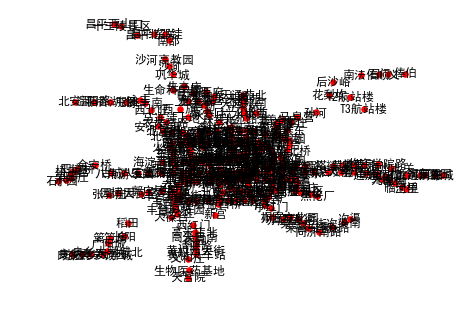

In [253]:
nx.draw(subway_graph, subway_location, with_labels=True, node_size=30)

In [247]:
subway_station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [248]:
subway_with_road = nx.Graph(subway_station_connection)

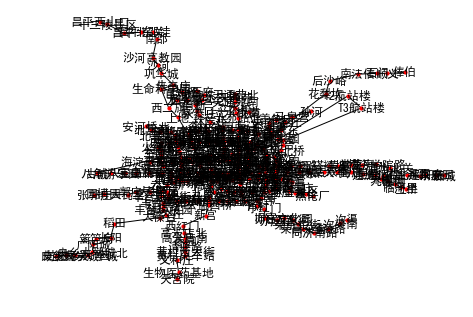

In [252]:
nx.draw(subway_with_road, subway_location, with_labels=True, node_size=10)

# search

In [85]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]##[[起始，目的地]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue#找到目的地
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop，找到起始
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        #print(pathes)

In [86]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += 1#距离默认1
        return distance

    return sorted(pathes, key=get_path_distnace)# key主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序

In [88]:
pretty_print(search('五道口', '生命科学园', subway_station_connection, sort_candidate=shortest_path_first))

五道口🚗->上地🚗->西二旗🚗->生命科学园


# Machine Learning

In [1]:
from sklearn.datasets import load_boston#boston数据
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()

In [3]:
x = dataset["data"]

In [11]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [4]:
y = dataset["target"]

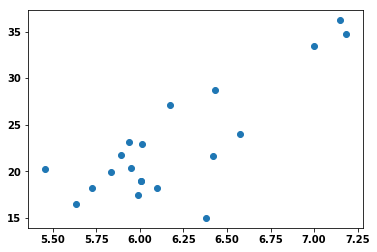

In [5]:
plt.scatter(x[0:20,5], y[0:20])

In [6]:
def draw_rm_and_price():
    plt.scatter(x[:,5], y)

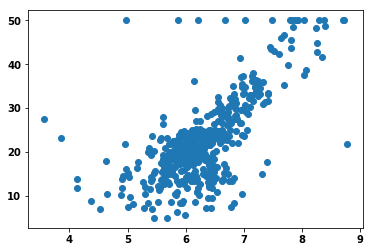

In [7]:
draw_rm_and_price()

In [8]:
room_num = x[:, 5]
price = y

In [9]:
import random
import numpy as np

In [10]:
def func(age, k, b): return k * age + b

In [11]:
def loss(y,yhat):#**2,平方
    return np.sum((y_i - yhat_i)**2 for y_i,yhat_i in zip(y,yhat))/len(list(y))#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [20]:
min_loss = float("inf")#
for i in  range(1000):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_by_random_k_and_b = [func(r,k,b) for r in room_num]
    #draw_rm_and_price()
    #plt.scatter(room_num,price_by_random_k_and_b)
    current_loss =loss(y,price_by_random_k_and_b)
    if current_loss < min_loss:
        best_k = k
        best_b = b
        min_loss = current_loss        
        print("best_k:{} best_b:{},and min_loss:{}".format(best_k,best_b,min_loss))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


best_k:-14 best_b:-81,and min_loss:36985.58037393672
best_k:-13 best_b:-73,and min_loss:31695.83895522332
best_k:11 best_b:26,and min_loss:5315.869803729247
best_k:5 best_b:21,and min_loss:945.3252375000001
best_k:-5 best_b:37,and min_loss:429.0877908596842
best_k:16 best_b:-81,and min_loss:75.91582615019774
best_k:9 best_b:-39,and min_loss:68.3174925039526
best_k:10 best_b:-44,and min_loss:57.58777213438735
best_k:14 best_b:-64,and min_loss:57.52850516205533


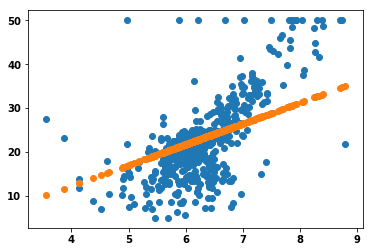

In [21]:
price_by_random_k_and_b = [func(r,4.746301430212446,-6.7024787369638705) for r in room_num]
draw_rm_and_price()
plt.scatter(room_num,price_by_random_k_and_b)

In [22]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [func(r, current_k, current_b) for r in room_num]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is : 0, get best_k: -32.63334413228208 best_b: 80.04013645705962, and the loss is: 22682.042801955467
When time is : 5, get best_k: -32.53334413228208 best_b: 79.94013645705962, and the loss is: 22522.23178136393
When time is : 6, get best_k: -32.43334413228208 best_b: 79.84013645705963, and the loss is: 22362.989161888865
When time is : 7, get best_k: -32.33334413228208 best_b: 79.74013645705963, and the loss is: 22204.31494353025
When time is : 8, get best_k: -32.23334413228208 best_b: 79.64013645705964, and the loss is: 22046.209126288155
When time is : 9, get best_k: -32.133344132282076 best_b: 79.54013645705965, and the loss is: 21888.671710162515
When time is : 10, get best_k: -32.033344132282075 best_b: 79.44013645705965, and the loss is: 21731.70269515339
When time is : 11, get best_k: -31.933344132282073 best_b: 79.34013645705966, and the loss is: 21575.302081260706
When time is : 12, get best_k: -31.833344132282072 best_b: 79.24013645705966, and the loss is: 21419.4

When time is : 243, get best_k: -8.733344132281873 best_b: 56.140136457060414, and the loss is: 653.1050344453643
When time is : 244, get best_k: -8.633344132281874 best_b: 56.04013645706041, and the loss is: 629.1418806930648
When time is : 245, get best_k: -8.533344132281874 best_b: 55.94013645706041, and the loss is: 605.7471280572478
When time is : 246, get best_k: -8.433344132281874 best_b: 55.84013645706041, and the loss is: 582.9207765379126
When time is : 247, get best_k: -8.333344132281875 best_b: 55.74013645706041, and the loss is: 560.6628261350597
When time is : 248, get best_k: -8.233344132281875 best_b: 55.64013645706041, and the loss is: 538.9732768486881
When time is : 249, get best_k: -8.133344132281875 best_b: 55.540136457060406, and the loss is: 517.8521286788008
When time is : 250, get best_k: -8.033344132281876 best_b: 55.440136457060404, and the loss is: 497.299381625395
When time is : 251, get best_k: -7.933344132281876 best_b: 55.3401364570604, and the loss is: 

# 导数

In [12]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [17]:
trying_times = 3000

min_loss = float('inf')

current_k = random.random() * 200 - 100#初始化研究
current_b = random.random() * 200 - 100

learning_rate = 0.001#学习率

for i in range(trying_times):
    
    price_by_k_and_b = [func(r, current_k, current_b) for r in room_num]#func()复杂函数拟合研究

    current_loss = loss(y, price_by_k_and_b)#loss()函数研究
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i %50 == 0 :
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k,  current_b, min_loss))
            
    current_k = current_k + (-1*partial_k(room_num, y, price_by_k_and_b))*learning_rate
    current_b = current_b + (-1*partial_b(room_num, y, price_by_k_and_b))*learning_rate 
                                                         

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


When time is : 0, get best_k: -73.64563812181794 best_b: -70.1367058648236, and the loss is: 312003.45201660355
When time is : 50, get best_k: 11.344674101181951 best_b: -56.74881151804545, and the loss is: 109.83042700979895
When time is : 100, get best_k: 12.522487281341506 best_b: -56.53669935223602, and the loss is: 49.50167322046844
When time is : 150, get best_k: 12.53479353090392 best_b: -56.50784317398786, and the loss is: 49.47586381247858
When time is : 200, get best_k: 12.530896923350669 best_b: -56.48156651741683, and the loss is: 49.46174987096095
When time is : 250, get best_k: 12.526779883937678 best_b: -56.45535682537289, and the loss is: 49.4476720788931
When time is : 300, get best_k: 12.522664661298949 best_b: -56.42917912041676, and the loss is: 49.43362810018043
When time is : 350, get best_k: 12.518554340197692 best_b: -56.403032878827446, and the loss is: 49.41961785317291
When time is : 400, get best_k: 12.514448957671615 best_b: -56.37691805604844, and the loss